In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
iris = load_iris()
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris['Target'] = iris['target']
df_iris['target name'] = np.where(df_iris['Target'] == 0, 'setosa', np.where(df_iris['Target'] == 1, 'versicolor', 'virginica'))

In [40]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [41]:
X = df_iris.iloc[:,:-2]
y = df_iris['Target']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [66]:
def score_train_test(X, y, knn):
    
    score = knn.score(X, y)
    recall = recall_score(y, knn.predict(X), average='macro')
    precision = precision_score(y, knn.predict(X), average='macro')
    f1 = f1_score(y, knn.predict(X), average='macro')
    return score, recall, precision, f1

In [73]:
steps_k = 1
curve_train, curve_test = [], []
while True:
    knn = KNeighborsClassifier(n_neighbors=steps_k)
    knn.fit(X_train_scaler, y_train)
    score, recall, precision, f1 = score_train_test(X_train_scaler, y_train, knn)
    curve_train.append([steps_k, score, recall, precision, f1])
    score, recall, precision, f1 = score_train_test(X_test_scaler, y_test, knn)
    curve_test.append([steps_k, score, recall, precision, f1])
    steps_k += 2
    if knn.score(X_train_scaler, y_train) < 0.5:
        break

In [74]:
pd_train = pd.DataFrame(curve_train, columns=['K', 'Train_score', 'Train_recall', 'Train_precision', 'Train_f1']).set_index('K')
pd_test = pd.DataFrame(curve_test, columns=['K', 'Test_score', 'Test_recall', 'Test_precision', 'Test_f1']).set_index('K')
df_score = pd.concat([pd_train, pd_test], axis=1)
df_score

,Train_score,Train_recall,Train_precision,Train_f1,Test_score,Test_recall,Test_precision,Test_f1
K,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.941667,0.941422,0.941938,0.941585,1.000000,1.000000,1.000000,1.000000
5,0.958333,0.958099,0.958647,0.958275,1.000000,1.000000,1.000000,1.000000
7,0.958333,0.958099,0.958647,0.958275,1.000000,1.000000,1.000000,1.000000
9,0.950000,0.949552,0.950974,0.949875,1.000000,1.000000,1.000000,1.000000
11,0.958333,0.958099,0.958647,0.958275,1.000000,1.000000,1.000000,1.000000
13,0.958333,0.958099,0.958647,0.958275,1.000000,1.000000,1.000000,1.000000
15,0.958333,0.958099,0.958647,0.958275,1.000000,1.000000,1.000000,1.000000
17,0.950000,0.949969,0.949969,0.949969,1.000000,1.000000,1.000000,1.000000


In [37]:
df_score.describe()

,Train,Test
count,48.000000,48.000000
mean,0.844792,0.897917
std,0.114476,0.145931
min,0.491667,0.433333
25%,0.831250,0.925000
50%,0.858333,0.950000
75%,0.950000,1.000000
max,1.000000,1.000000


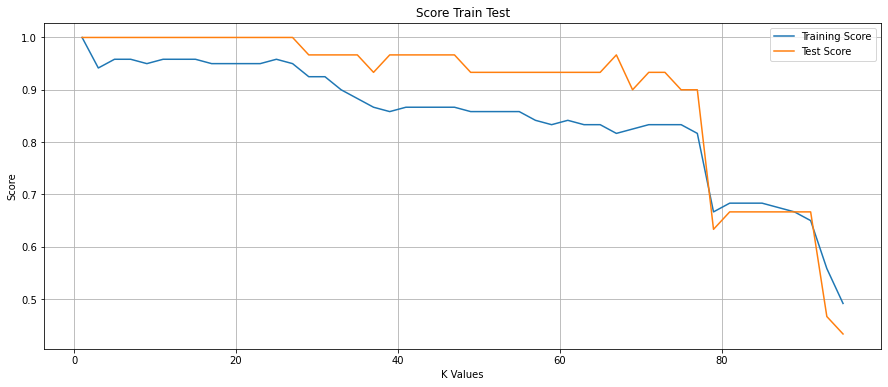

In [34]:
plt.figure(figsize=(15, 6))
x_values_train = [point[0] for point in curve_train]
y_values_train = [point[1] for point in curve_train]
sns.lineplot(x=x_values_train, y=y_values_train, label='Training Score')
x_values_test = [point[0] for point in curve_test]
y_values_test = [point[1] for point in curve_test]
sns.lineplot(x=x_values_test, y=y_values_test, markers='x', label='Test Score')
plt.xlabel('K Values')
plt.ylabel('Score')
plt.title('Score Train Test')
plt.grid(True)
plt.legend()
plt.show()

In [112]:
grid_search.score(X_test_scaler, y_test)

0.3333333333333333